In [21]:
import pandas as pd
import re
import numpy as np
import textstat
from stargazer.stargazer import Stargazer
import statsmodels.api as sm


C:\Users\youxi\anaconda3\envs\bar\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
data=pd.read_excel('kickstarter_filtered_1121.xlsx')

## Preprocessed the data

Frequency of each state:
failed        28968
successful    25716
Name: State, dtype: int64
Total: 54684


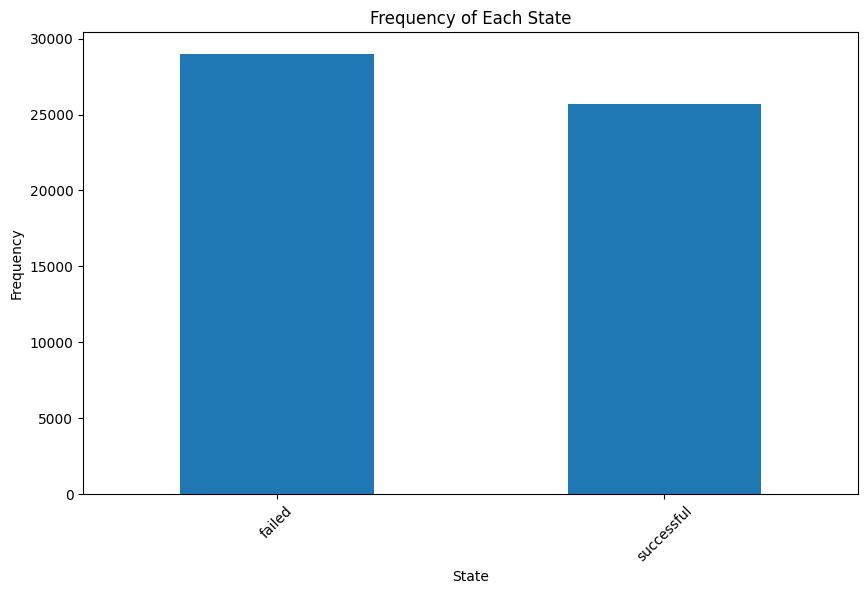

In [6]:
state_counts = data['State'].value_counts()
print("Frequency of each state:")
print(state_counts)
print(f'Total: {len(data)}')
# Plotting
import matplotlib.pyplot as plt
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Each State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Frequency of each category:
Games         23257
Design        15922
Technology    15505
Name: Category, dtype: int64
Total: 54684


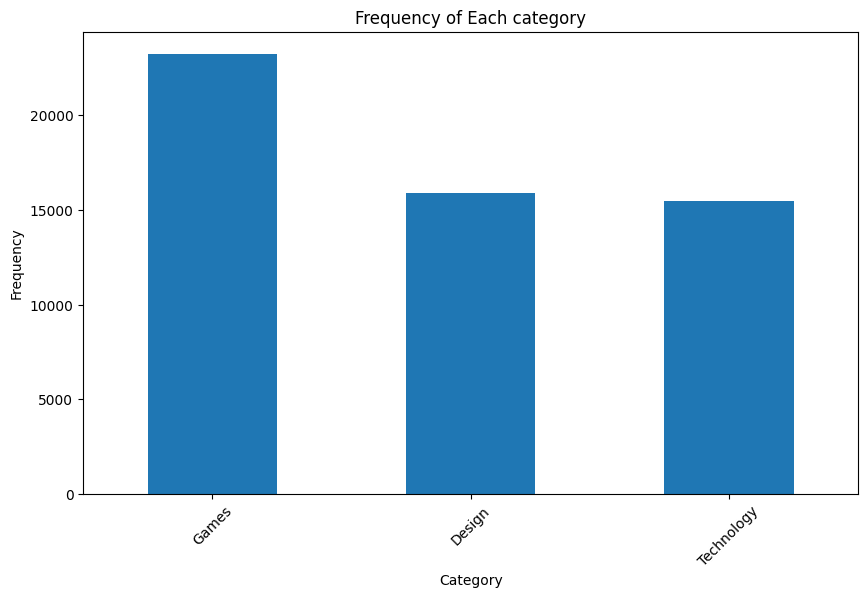

In [8]:
state_counts = data['Category'].value_counts()
print("Frequency of each category:")
print(state_counts)
print(f'Total: {len(data)}')
# Plotting
import matplotlib.pyplot as plt
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Each category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:
data = data.drop('Unnamed: 0', axis=1)
data.dropna(subset=['Category'], inplace=True)
data['State'] = data['State'].map({'successful': True, 'failed': False})

## Create Columns named education_level(categorial variable,the higher the level,the bigger the number)

In [10]:
def extract_education_level(text):
    if not isinstance(text, str):
        return 0  # Default to 0 if no match is found or if the text is not a string

    # Define patterns for different educational levels
    doctorate_pattern = r'(phd|doctorate|doctor|ph\.?d\.?|Ph\.?d|Dr|doctoral|postdoc)'
    graduate_pattern = r'(master|MBA|mphil|postgraduate\|m\.?a\.?|m\.?s\.?|mba|master\'s|MS)'
    bachelors_pattern = r'(bachelor|undergraduate|undergrad|undergra|b\.?a\.?|b\.?s\.?|bachelor\'s|BS)'
    junior_college_pattern = r'(junior\s*college|associate\'s)'
    high_school_pattern = r'(high\s*school|secondary\s*school|\bHS\b|middle school)'

    # Check for matches starting from the highest level
    if re.search(doctorate_pattern, text, re.IGNORECASE):
        return 5
    elif re.search(graduate_pattern, text, re.IGNORECASE):
        return 4
    elif re.search(bachelors_pattern, text, re.IGNORECASE):
        return 3
    elif re.search(junior_college_pattern, text, re.IGNORECASE):
        return 2
    elif re.search(high_school_pattern, text, re.IGNORECASE):
        return 1
    else:
        return 0  # No match found


data['education_level'] = data['Education_Context'].apply(extract_education_level)

## Creat columned named Loction

In [13]:
# Extract the state abbreviation from the 'ProjectLocation' column
data['Location'] = data['ProjectLocation'].apply(lambda x: x.split(',')[1].strip() if pd.notnull(x) else x)

# Display the first few rows to verify the new column
print(data[['ProjectLocation', 'Location']].head())

# Now you can perform a value count on the new 'Location' column
location_counts = data['Location'].value_counts()
print("Frequency of each Location:")
print(location_counts)
print(f'Total: {len(data)}')


   ProjectLocation Location
0   New Castle, DE       DE
1   New Castle, DE       DE
2  Minneapolis, MN       MN
3      Phoenix, AZ       AZ
4      Bozeman, MT       MT
Frequency of each Location:
CA             10445
NY              4352
TX              3501
FL              3264
WA              2193
               ...  
Richardson         1
Clayton            1
Brownsville        1
Newark             1
Baton Rouge        1
Name: Location, Length: 197, dtype: int64
Total: 54684


In [14]:
#Calculate the percentage for each location
location_percentages = (location_counts / len(data)) * 100

# Create a DataFrame to display both counts and percentages
location_summary = pd.DataFrame({
    'Count': location_counts,
    'Percentage': location_percentages
})

# Display the results
print("Frequency and Percentage of each Location:")
print(location_summary)
print(f'Total: {len(data)}')

# Optionally, if you want to display just the top 10 locations:
print("\nTop 10 Locations:")
print(location_summary.head(10))

Frequency and Percentage of each Location:
             Count  Percentage
CA           10445   19.100651
NY            4352    7.958452
TX            3501    6.402238
FL            3264    5.968839
WA            2193    4.010314
...            ...         ...
Richardson       1    0.001829
Clayton          1    0.001829
Brownsville      1    0.001829
Newark           1    0.001829
Baton Rouge      1    0.001829

[197 rows x 2 columns]
Total: 54684

Top 10 Locations:
    Count  Percentage
CA  10445   19.100651
NY   4352    7.958452
TX   3501    6.402238
FL   3264    5.968839
WA   2193    4.010314
IL   2187    3.999342
PA   1662    3.039280
UT   1659    3.033794
CO   1537    2.810694
GA   1474    2.695487


## Cheak the distribution of the variables

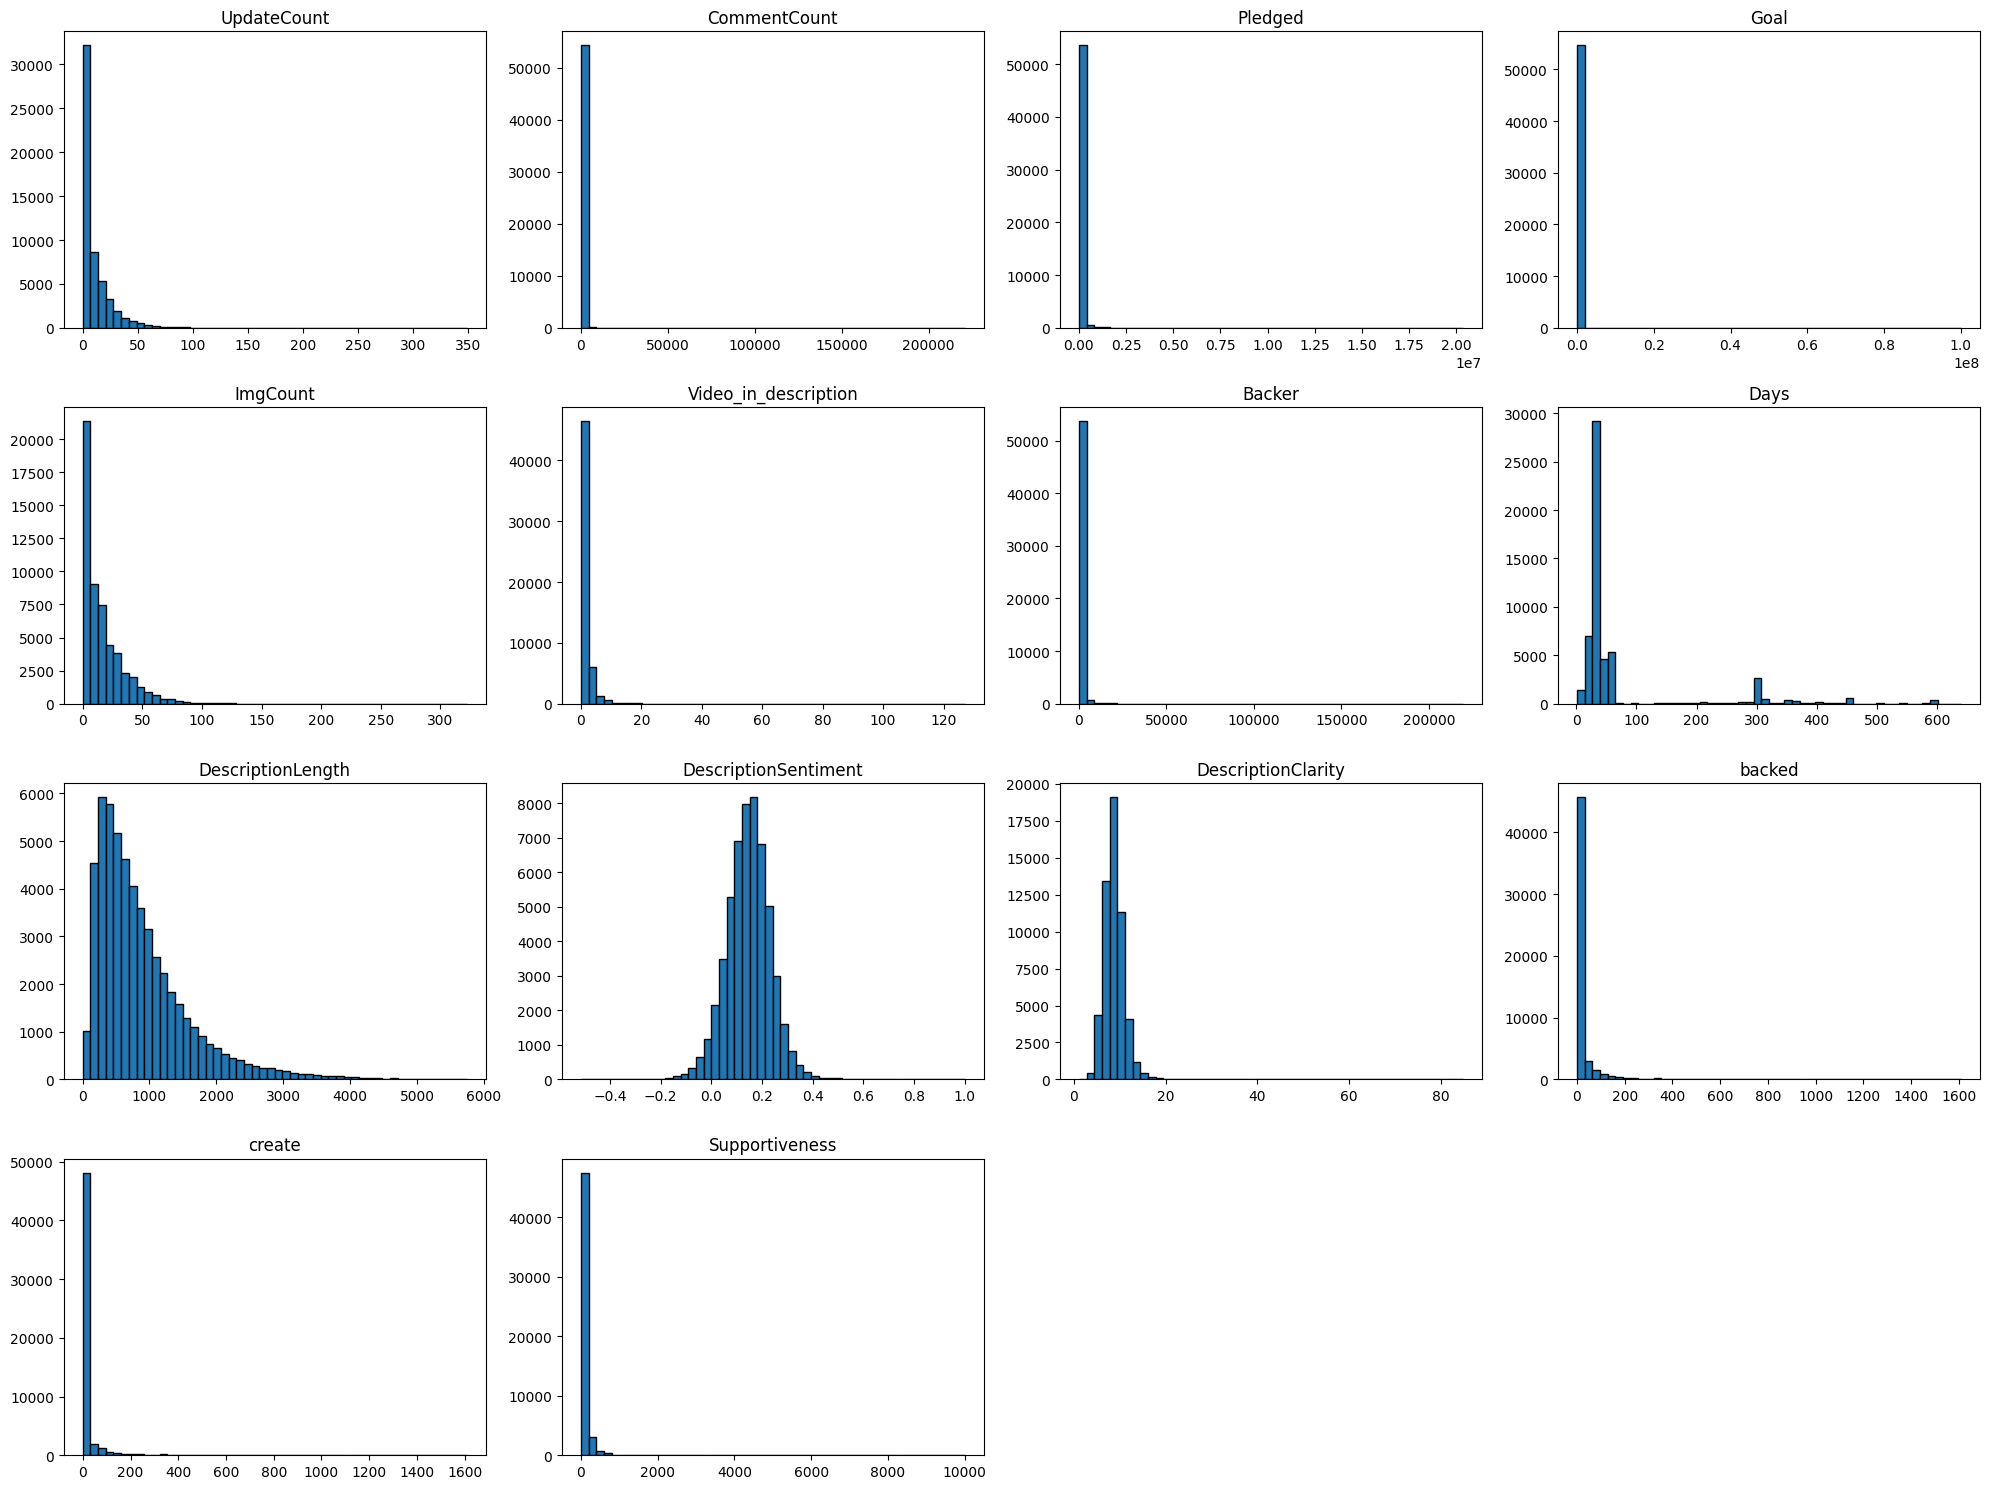

In [12]:
columns_to_plot = [
    'UpdateCount', 'CommentCount', 'Pledged', 'Goal', 'ImgCount',
    'Video_in_description', 'Backer', 'Days', 'DescriptionLength',
    'DescriptionSentiment', 'DescriptionClarity', 'backed', 'create', 'Supportiveness'
]

# Plot histograms for each column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    # Using dropna() to avoid errors with NaN values
    plt.hist(data[column].dropna(), bins=50, edgecolor='black')
    plt.title(column)
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

## Perfom logged variables

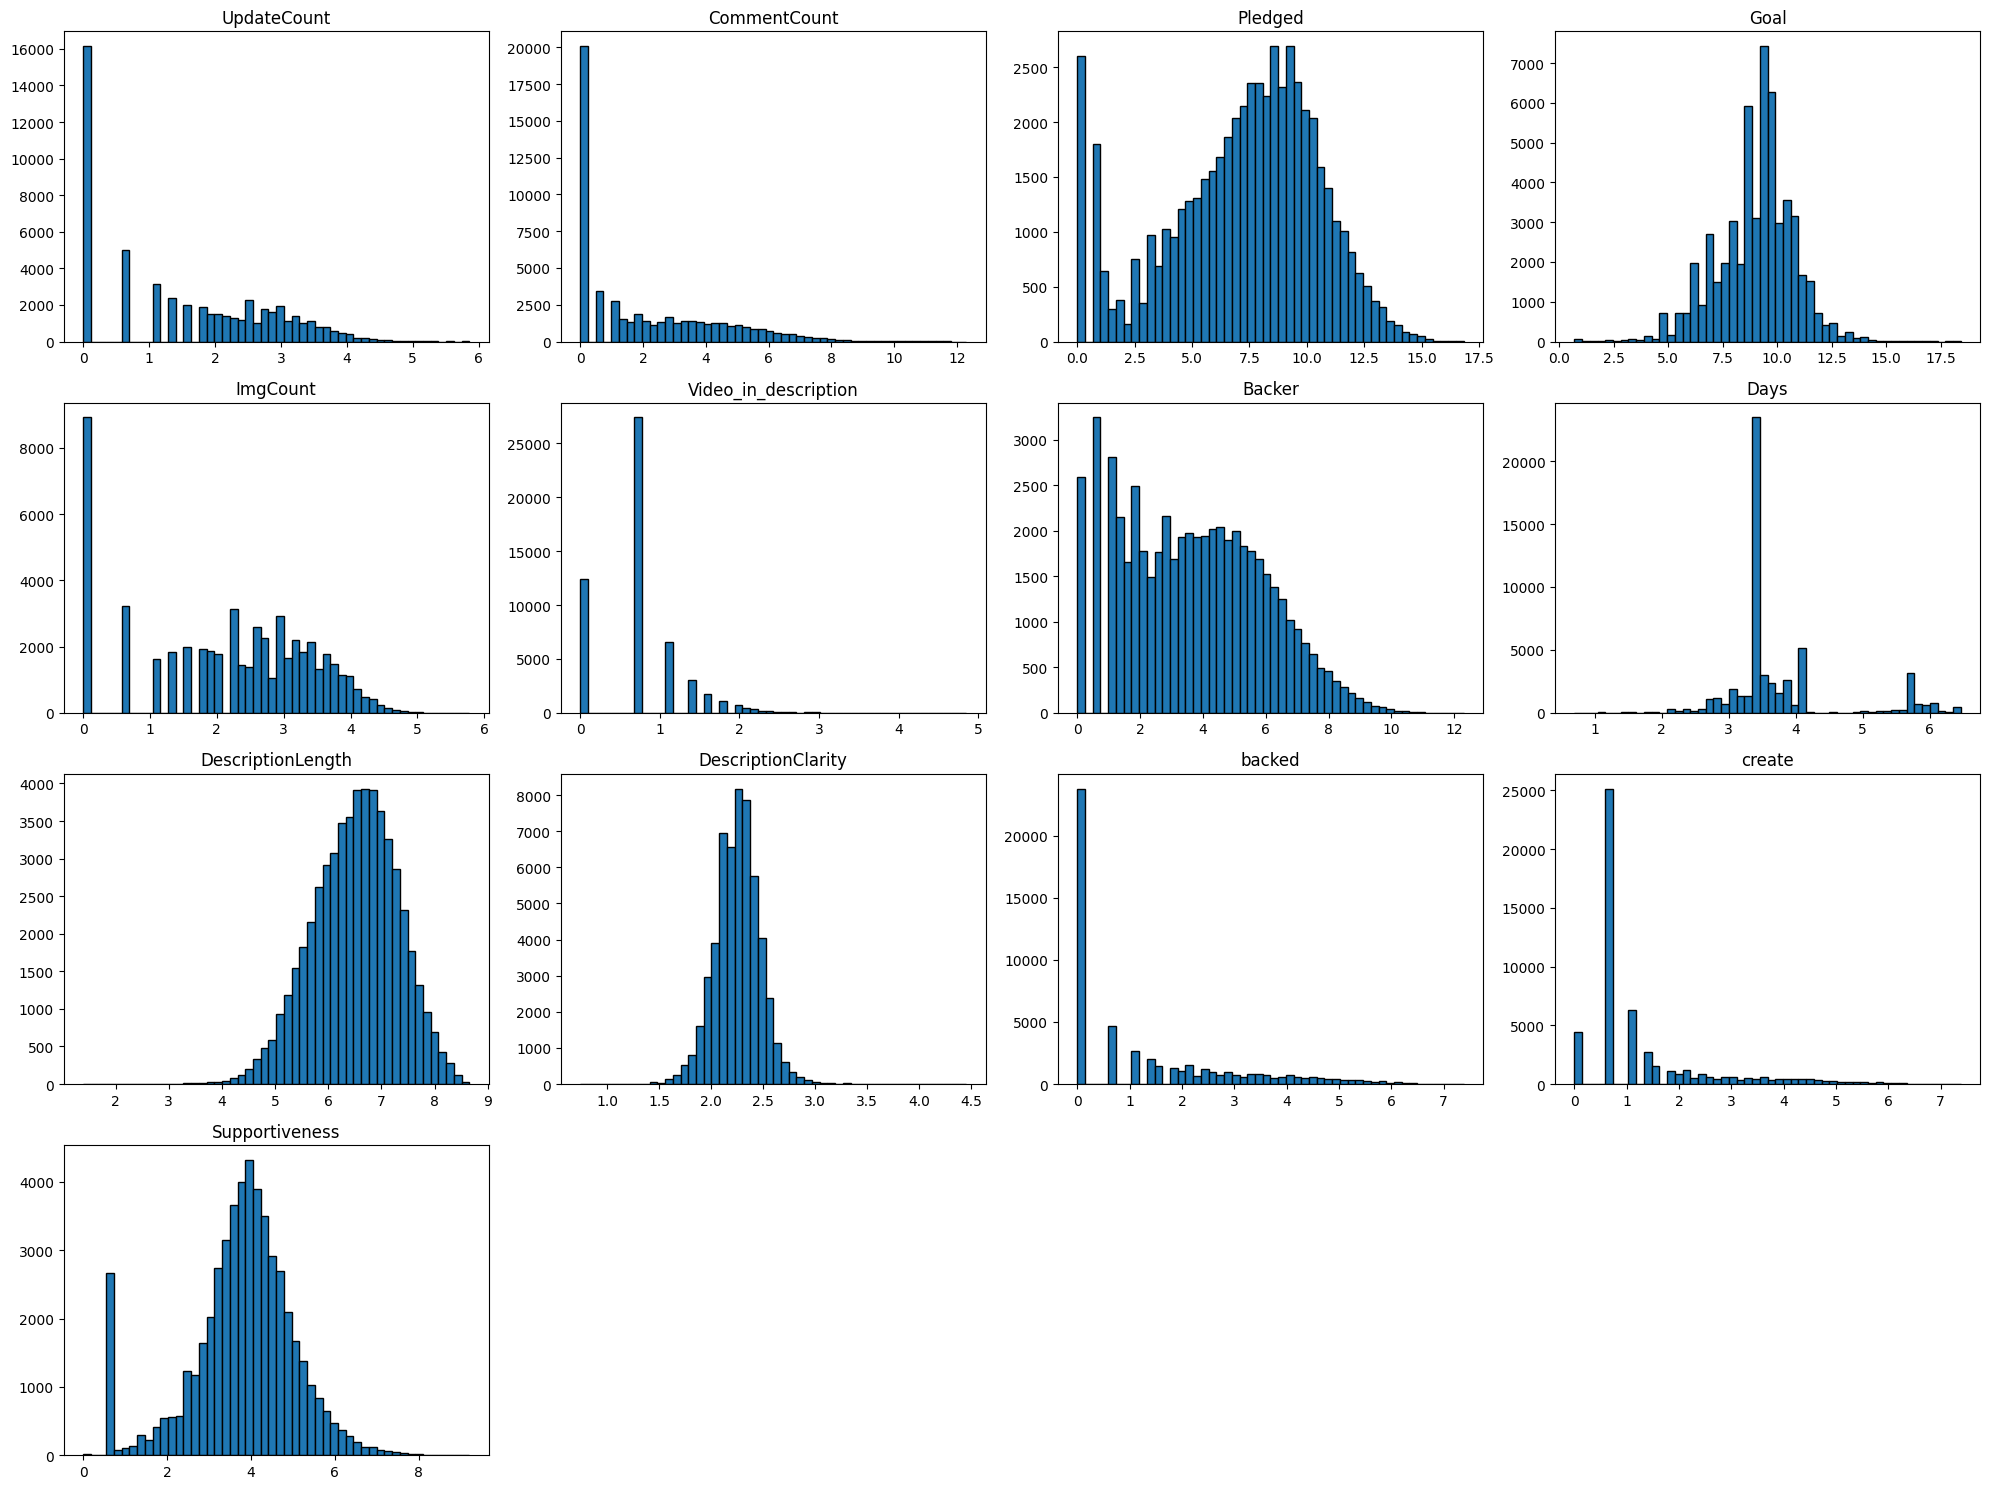

In [15]:
columns_to_transform = [
    'UpdateCount', 'CommentCount', 'Pledged', 'Goal', 'ImgCount',
    'Video_in_description', 'Backer', 'Days', 'DescriptionLength',
    'DescriptionClarity', 'backed', 'create', 'Supportiveness'
]
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(4, 4, i)
    plt.hist(np.log1p(data[column].dropna()), bins=50, edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()

In [16]:
data['Total pledges'] = np.log(data['Pledged'] + 1)
data['Goal'] = np.log(data['Goal'] + 1)
# Now, plot the histogram of the log-transformed 'Pledged' values
data['Time span'] = np.log(data['Days']+1)
data['Financing goal'] = np.log(data['Goal'] + 1)
data['DescriptionLength'] = np.log(data['DescriptionLength'] + 1)
data['DescriptionClarity'] = np.log(data['DescriptionClarity'] + 1)


## Statisics summary of the key variables

In [17]:
# Assuming these are some of your key variables
key_variables = ['UpdateCount', 'CommentCount', 'Pledged', 'Goal', 'ImgCount', 'Video_in_description',
                 'Backer', 'Days', 'DescriptionLength', 'DescriptionSentiment', 'DescriptionClarity',
                'backed','create','Supportiveness']
# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)
# Summary statistics for selected key variables
data[key_variables].describe()


,UpdateCount,CommentCount,Pledged,Goal,ImgCount,Video_in_description,Backer,Days,DescriptionLength,DescriptionSentiment,DescriptionClarity,backed,create,Supportiveness
count,54684.00,54684.00,54663.00,54684.00,54684.00,54684.00,54663.00,54684.00,54684.00,54684.00,54684.00,53496.00,53496.00,52076.00
mean,9.88,213.77,44363.37,8.98,16.14,1.51,432.57,71.90,6.51,0.15,2.25,23.57,17.76,91.09
std,15.48,2169.15,274414.01,1.76,18.39,2.09,2242.83,108.60,0.80,0.09,0.22,82.94,76.40,195.95
min,0.00,0.00,0.00,0.69,0.00,0.00,0.00,1.00,1.39,-0.51,0.74,0.00,0.00,0.00
25%,0.00,0.00,181.00,8.01,2.00,1.00,5.00,30.00,5.97,0.09,2.12,0.00,1.00,24.54
50%,4.00,3.00,2238.00,9.21,10.00,1.00,38.00,30.00,6.55,0.15,2.25,1.00,1.00,48.61
75%,14.00,42.00,14651.50,10.13,23.00,2.00,211.00,45.00,7.07,0.20,2.39,11.00,4.00,93.35
max,349.00,220719.00,20338986.00,18.42,322.00,127.00,219382.00,640.00,8.66,1.00,4.45,1608.00,1608.00,10000.00


In [18]:
data[['State', 'ProWeLove', 'Featured', 'Connect', 'High_Educated_Bio']] = data[['State', 'ProWeLove', 'Featured', 'Connect', 'High_Educated_Bio']].astype(int)

key_dummy_columns = data[['State','ProWeLove', 'Featured', 'Connect', 'High_Educated_Bio','education_level',]].apply(pd.value_counts)
key_dummy_columns

,State,ProWeLove,Featured,Connect,High_Educated_Bio,education_level
0,28968.00,47711.00,31257.00,33961.00,43474.00,48035
1,25716.00,6973.00,23427.00,20723.00,11210.00,771
2,NaN,NaN,NaN,NaN,NaN,10
3,NaN,NaN,NaN,NaN,NaN,2155
4,NaN,NaN,NaN,NaN,NaN,2031
5,NaN,NaN,NaN,NaN,NaN,1682


## Regression Total Pledges and key Variables

In [19]:
data1 = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Total pledges', 'High_Educated_Bio', 'DescriptionSentiment', 
                                                              'Financing goal', 'Time span', 'DescriptionLength', 'DescriptionClarity',
                                                              'ProWeLove', 'Featured', 'Connect', 'Supportiveness','DescriptionClarity',
                                                               'Video_in_description','create','backed','Location'])

In [22]:
# Select independent variables and dependent variable
x1 = data1[['education_level', 'DescriptionSentiment', 'Financing goal', 'Time span', 
           'DescriptionLength','Supportiveness', 'ProWeLove','Featured', 'Connect','DescriptionClarity',
                                                               'Video_in_description','create','backed']]
y1 = data1['Total pledges']

# Add a constant to the independent variables
X1 = sm.add_constant(x1)

# Fit the OLS model
ols_est1 = sm.OLS(y1, X1).fit()


# Print the summary of the model
print(ols_est1.summary())

                            OLS Regression Results                            
Dep. Variable:          Total pledges   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2749.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:48:16   Log-Likelihood:            -1.1486e+05
No. Observations:               51033   AIC:                         2.297e+05
Df Residuals:                   51019   BIC:                         2.299e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.0554 

In [23]:
# Select independent variables and dependent variable
x1 = data1[['education_level', 'DescriptionSentiment', 'Financing goal', 'Time span', 
           'DescriptionLength','Supportiveness', 'ProWeLove','Featured', 'Connect','Video_in_description','create','backed']]
y1 = data1['Total pledges']

# Add a constant to the independent variables
X1 = sm.add_constant(x1)

# Fit the OLS model
ols_est1 = sm.OLS(y1, X1).fit()


# Print the summary of the model
print(ols_est1.summary())

                            OLS Regression Results                            
Dep. Variable:          Total pledges   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2979.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:48:17   Log-Likelihood:            -1.1486e+05
No. Observations:               51033   AIC:                         2.297e+05
Df Residuals:                   51020   BIC:                         2.299e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.9984 

## Regression Total Pledges and key Variables of Category

In [24]:
# Categories to analyze
categories = ['Technology', 'Design', 'Games']

# List to store OLS results
results = []

# Loop through each category
for category in categories:
    # Filter the data for the current category
    data_category = data1[data1['Category'] == category]

    # Select independent variables and dependent variable
    x_category = data_category[['High_Educated_Bio', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                                'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                                 'Video_in_description', 'create', 'backed']]
    y_category = data_category['Total pledges']

    # Add a constant to the independent variables
    X_category = sm.add_constant(x_category)

    # Fit the OLS model and store the result
    ols_est_category = sm.OLS(y_category, X_category).fit()
    results.append(ols_est_category)

# Generate Stargazer table
stargazer = Stargazer(results)
stargazer.title('OLS Regression Results by Category')
stargazer.custom_columns(categories, [1, 1, 1])
stargazer

In [25]:
# Categories to analyze
categories = ['Technology', 'Design', 'Games']

# List to store OLS results
results = []

# Loop through each category
for category in categories:
    # Filter the data for the current category
    data_category = data1[data1['Category'] == category]

    # Select independent variables and dependent variable
    x_category = data_category[['education_level', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                                'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                                 'Video_in_description', 'create', 'backed']]
    y_category = data_category['Total pledges']

    # Add a constant to the independent variables
    X_category = sm.add_constant(x_category)

    # Fit the OLS model and store the result
    ols_est_category = sm.OLS(y_category, X_category).fit()
    results.append(ols_est_category)

# Generate Stargazer table
stargazer = Stargazer(results)
stargazer.title('OLS Regression Results by Category')
stargazer.custom_columns(categories, [1, 1, 1])
stargazer

# Regression Total Pledges and key Variables of years

In [26]:
# List to store years for analysis
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# List to store OLS results
yearly_results = []

# Loop through each year
for year in years:
    # Filter the data for the current year
    data_year = data1[(data1['EndDate'].dt.year == year)]

    # Select independent variables and dependent variable
    x_year = data_year[['education_level', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                        'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                        'Video_in_description', 'create', 'backed']]
    y_year = data_year['Total pledges']

    # Add a constant to the independent variables
    X_year = sm.add_constant(x_year)

    # Fit the OLS model and store the result
    ols_est_year = sm.OLS(y_year, X_year).fit()
    yearly_results.append(ols_est_year)

# Generate Stargazer table
stargazer = Stargazer(yearly_results)
stargazer.title('OLS Regression Results by Year')
stargazer.custom_columns([str(year) for year in years], [1]*len(years))
stargazer

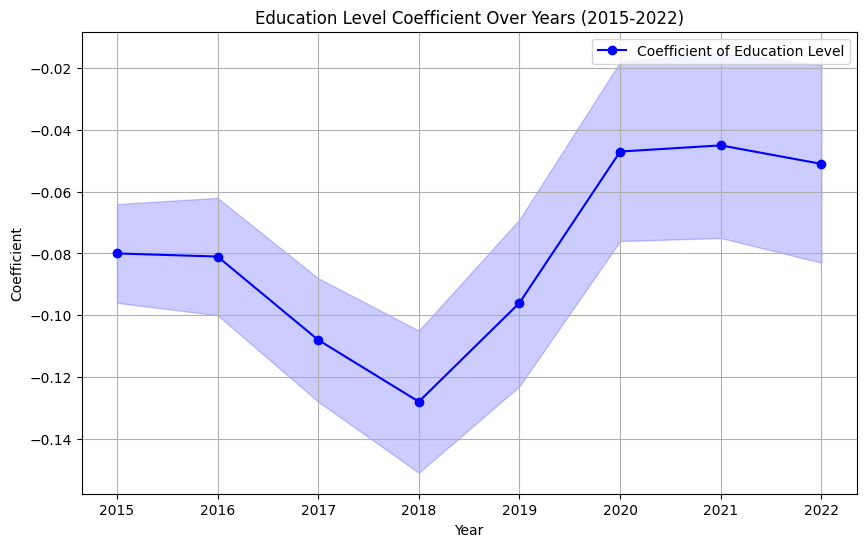

In [28]:
# Coefficients for 'education_level' for each year
coefficients = [-0.080, -0.081, -0.108, -0.128, -0.096, -0.047, -0.045, -0.051]

# Standard errors for each coefficient
std_errors = [0.016, 0.019, 0.020, 0.023, 0.027, 0.029, 0.030, 0.032]

# Calculate the lower and upper bounds for error bars
lower_bounds = np.array(coefficients) - np.array(std_errors)
upper_bounds = np.array(coefficients) + np.array(std_errors)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(years, coefficients, marker='o', color='b', label='Coefficient of Education Level')
plt.fill_between(years, lower_bounds, upper_bounds, color='blue', alpha=0.2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.title('Education Level Coefficient Over Years (2015-2022)')
plt.xticks(years)
plt.grid(True)

# Add a legend
plt.legend()
plt.show()

In [29]:
# List to store years for analysis
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# List to store OLS results
yearly_results = []

# Loop through each year
for year in years:
    # Filter the data for the current year
    data_year = data1[(data1['EndDate'].dt.year == year)]

    # Select independentvariables and dependent variable
    x_year = data_year[['High_Educated_Bio', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                        'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                        'Video_in_description', 'create', 'backed']]
    y_year = data_year['Total pledges']

    # Add a constant to the independent variables
    X_year = sm.add_constant(x_year)

    # Fit the OLS model and store the result
    ols_est_year = sm.OLS(y_year, X_year).fit()
    yearly_results.append(ols_est_year)

# Generate Stargazer table
stargazer = Stargazer(yearly_results)
stargazer.title('OLS Regression Results by Year')
stargazer.custom_columns([str(year) for year in years], [1]*len(years))
stargazer

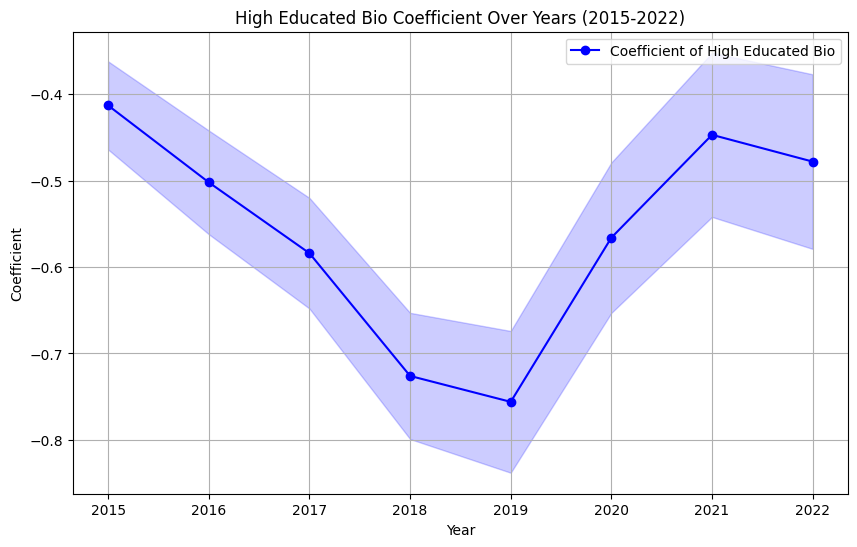

In [30]:
# Coefficients for 'High_Educated_Bio' for each year
coefficients = [-0.413, -0.502, -0.584, -0.726, -0.756, -0.566, -0.447, -0.478]

# Standard errors for each coefficient
std_errors = [0.051, 0.060, 0.064, 0.073, 0.082, 0.087, 0.095, 0.101]

# Calculate the lower and upper bounds for error bars
lower_bounds = np.array(coefficients) - np.array(std_errors)
upper_bounds = np.array(coefficients) + np.array(std_errors)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(years, coefficients, marker='o', color='b', label='Coefficient of High Educated Bio')
plt.fill_between(years, lower_bounds, upper_bounds, color='blue', alpha=0.2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.title('High Educated Bio Coefficient Over Years (2015-2022)')
plt.xticks(years)
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Regression of Total Pledges and key variables of each category over time

In [31]:
# Dictionary to store OLS results for each category
category_results = {category: [] for category in categories}

# Loop through each category and year
for category in categories:
    for year in years:
        # Filter the data for the current category and year
        data_category_year = data1[(data1['Category'] == category) & (data1['EndDate'].dt.year == year)]

        # Select independent variables and dependent variable
        x = data_category_year[['education_level', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                                'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                                'Video_in_description', 'create', 'backed']]
        y = data_category_year['Total pledges']

        # Add a constant to the independent variables
        X = sm.add_constant(x)

        # Fit the OLS model and store the result
        ols_est_category_year = sm.OLS(y, X).fit()
        category_results[category].append(ols_est_category_year)

# Generate Stargazer tables for each category
stargazers = []
for category in categories:
    stg = Stargazer(category_results[category])
    stg.title(f'OLS Regression Results by Year - {category}')
    stg.custom_columns(years, [1]*len(years))
    stargazers.append(stg)

from IPython.core.display import HTML

# Display Stargazer tables
for stg in stargazers:
    display(HTML(stg.render_html()))

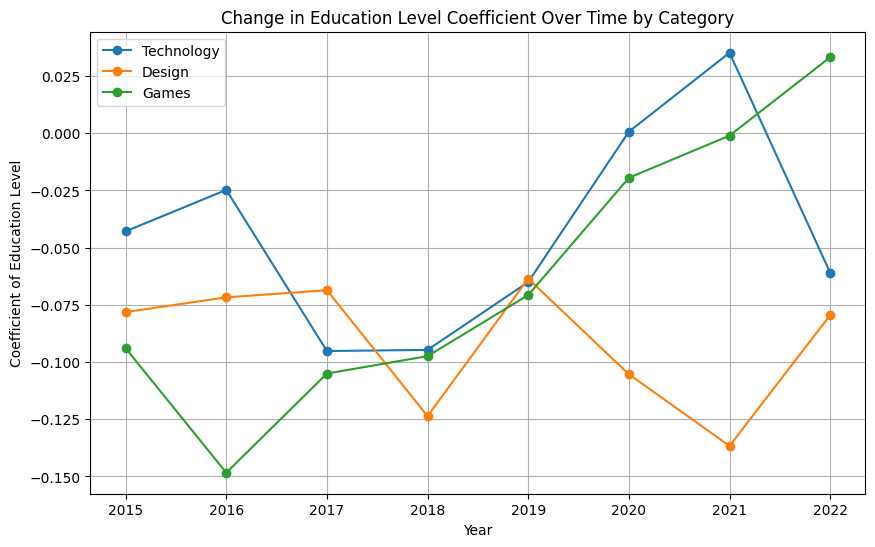

In [36]:


# Display Stargazer tables
for stg in stargazers:
    display(HTML(stg.render_html()))
# Dictionary to store coefficients for each category and year
coefficients = {category: [] for category in categories}

# Loop through each category and year
for category in categories:
    for year in years:
        # Filter the data for the current category and year
        data_category_year = data1[(data1['Category'] == category) & (data1['EndDate'].dt.year == year)]

        # Select independent variables and dependent variable
        x = data_category_year[['education_level', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                                'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                                'Video_in_description', 'create', 'backed']]
        y = data_category_year['Total pledges']

        # Add a constant to the independent variables
        X = sm.add_constant(x)

        # Fit the OLS model
        ols_model = sm.OLS(y, X).fit()

        # Extract the coefficient of 'education_level'
        coef_education_level = ols_model.params.get('education_level', None)
        
        # Store the coefficient
        coefficients[category].append(coef_education_level)

# Plotting
plt.figure(figsize=(10, 6))
for category in categories:
    plt.plot(years, coefficients[category], marker='o', label=category)

plt.title('Change in Education Level Coefficient Over Time by Category')
plt.xlabel('Year')
plt.ylabel('Coefficient of Education Level')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()

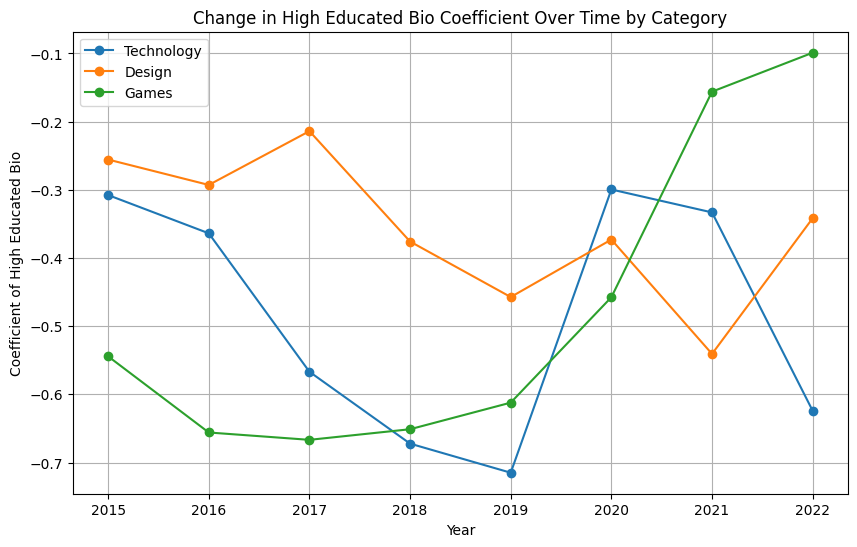

In [34]:
# Categories to analyze
categories = ['Technology', 'Design', 'Games']
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Dictionary to store coefficients for each category and year
coefficients = {category: [] for category in categories}

# Loop through each category and year
for category in categories:
    for year in years:
        # Filter the data for the current category and year
        data_category_year = data1[(data1['Category'] == category) & (data1['EndDate'].dt.year == year)]

        # Select independent variables and dependent variable
        x = data_category_year[['High_Educated_Bio', 'DescriptionSentiment', 'Financing goal', 'Time span', 
                                'DescriptionLength', 'Supportiveness', 'ProWeLove', 'Featured', 'Connect', 
                                'Video_in_description', 'create', 'backed']]
        y = data_category_year['Total pledges']

        # Add a constant to the independent variables
        X = sm.add_constant(x)

        # Fit the OLS model
        ols_model = sm.OLS(y, X).fit()

        # Extract the coefficient of 'High_Educated_Bio'
        coef_high_educated_bio = ols_model.params.get('High_Educated_Bio', None)
        
        # Store the coefficient
        coefficients[category].append(coef_high_educated_bio)

# Plotting
plt.figure(figsize=(10, 6))
for category in categories:
    plt.plot(years, coefficients[category], marker='o', label=category)

plt.title('Change in High Educated Bio Coefficient Over Time by Category')
plt.xlabel('Year')
plt.ylabel('Coefficient of High Educated Bio')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()